In [1]:
# Import Libraries 
import pandas as pd # Data prepocessing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import missingno as msno # missing data - Data Visualization
import collections as Counter # counting

In [8]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# for Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Classifiers( M.L Algorithms)

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

In [15]:
import numpy as np

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
#Load Data
churn_df= pd.read_csv(r"C:\Users\MY-PC\Downloads\Customer-Churn.csv")

In [12]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<h1 style="font-size:3rem;color:blue;">Exploratory Data Analysis</h1


In [13]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
#Replace the non-numeric  values to NaN
churn_df["TotalCharges"] = churn_df["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)

In [17]:
churn_df.drop("customerID", axis=1,inplace=True)

In [18]:
# Change the totalcharges data type from object to float
churn_df["TotalCharges"]= churn_df["TotalCharges"].astype(float)

In [19]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
# Or  Convert the "TotalCharges" column data type from object to float
churn_df["TotalCharges"] = churn_df["TotalCharges"].astype(float)

In [21]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
churn_df.describe(include=['object','bool'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [23]:
# Display the columns in the churn_df DataFrame for examination
column_names = churn_df.columns
print(column_names)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [24]:
churn_df.duplicated().sum()

22

In [25]:
# Check for missing data
missing_data_counts = churn_df.isnull().sum()

In [26]:
# Print the counts of missing data
print(missing_data_counts)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


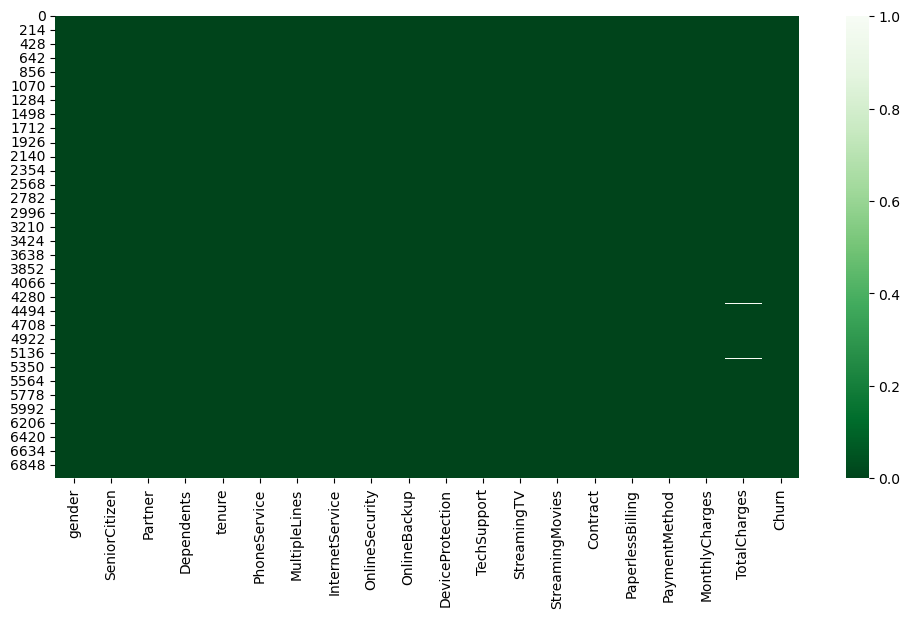

In [40]:
# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(churn_df.isnull(), cbar=True, cmap="Greens_r")

# Show the plot
plt.show()

# Univariate

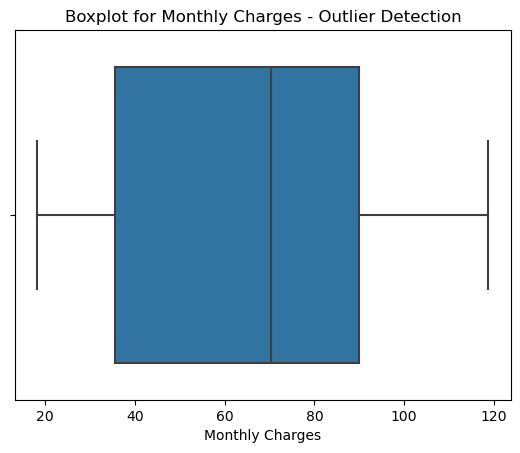

In [41]:
# Univariate Analysis - Check for outliers in the "MonthlyCharges" column
sns.boxplot(x=churn_df["MonthlyCharges"])

# Set plot labels and title
plt.xlabel("Monthly Charges")
plt.title("Boxplot for Monthly Charges - Outlier Detection")

# Show the plot
plt.show()

# OBSERVATIONS

No outliers are observed in the dataset.

The median (Q2) is centered around the 70 mark.

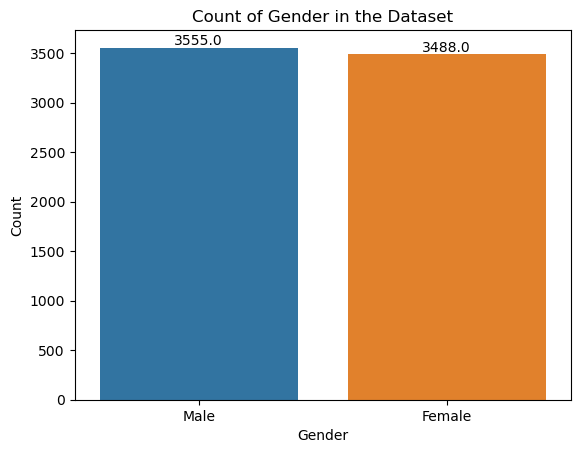

In [42]:
# Count of Gender
order = churn_df['gender'].value_counts(ascending=False).index
ax = sns.countplot(x="gender", data=churn_df, order=order)

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Set plot labels and title
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Count of Gender in the Dataset")

# Show the plot
plt.show()

# Observations:

The company has 3,555 male, slightly outnumbering the 3,488 female.

In [44]:
from collections import Counter

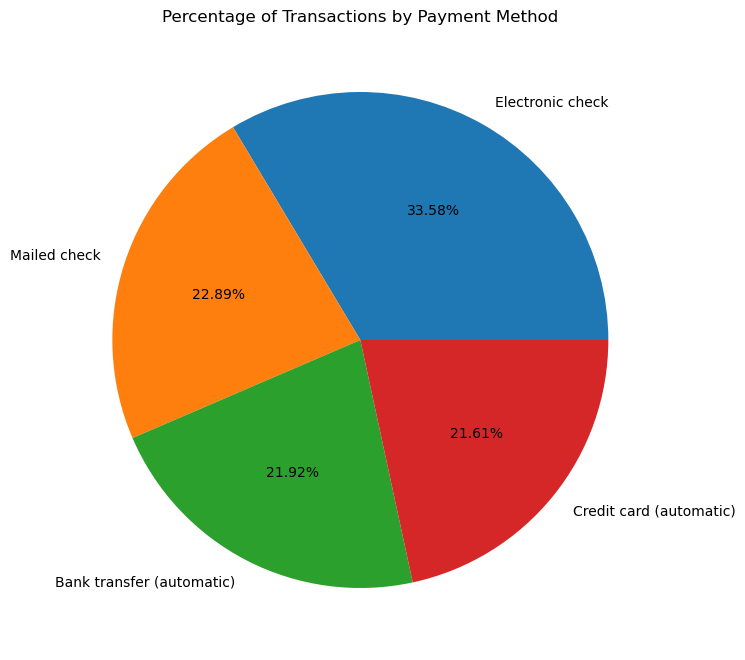

In [49]:
# Total transactions by Payment Method using a pie chart
fig, ax = plt.subplots(figsize=(8, 10))

# Count occurrences of each Payment Method
payment_method_counts = Counter(churn_df["PaymentMethod"])

# Plot the pie chart
ax.pie(payment_method_counts.values(), labels=payment_method_counts.keys(), autopct=lambda p: f'{p:.2f}%')

# Set plot title
ax.set_title("Percentage of Transactions by Payment Method")

# Show the plot
plt.show()

# OR

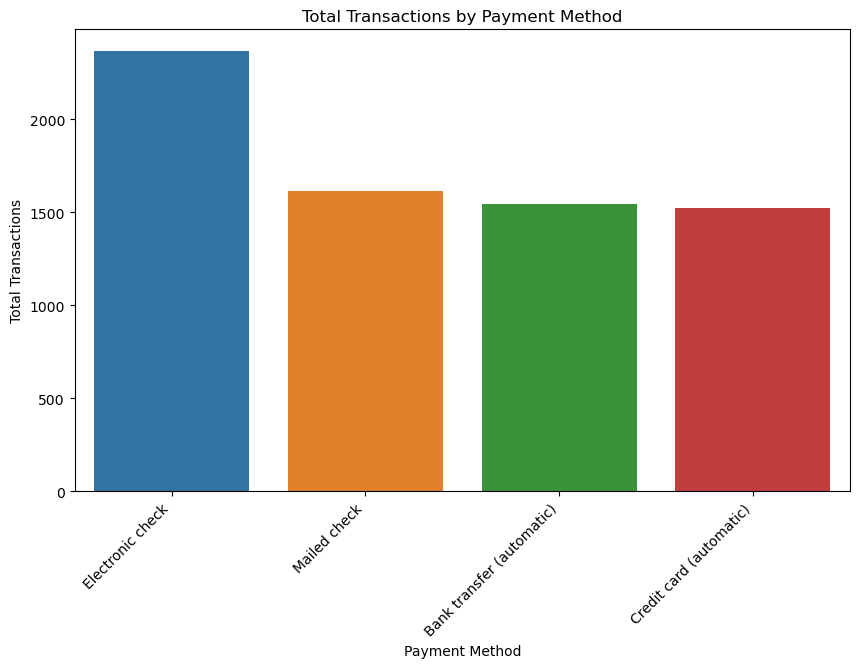

In [50]:
# Total transactions by Payment Method using a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Count occurrences of each Payment Method
payment_method_counts = Counter(churn_df["PaymentMethod"])

# Create a bar chart
sns.barplot(x=list(payment_method_counts.keys()), y=list(payment_method_counts.values()), ax=ax)

# Set plot labels and title
ax.set_xlabel("Payment Method")
ax.set_ylabel("Total Transactions")
ax.set_title("Total Transactions by Payment Method")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Observations:

The majority of customers opt for a Month-to-Month contract, constituting 55.02% of the subscriptions.
Two-Year contracts come next with a share of 24.07%, while the least preferred contract type is One Year, 
accounting for 20.91% of the subscriptions.

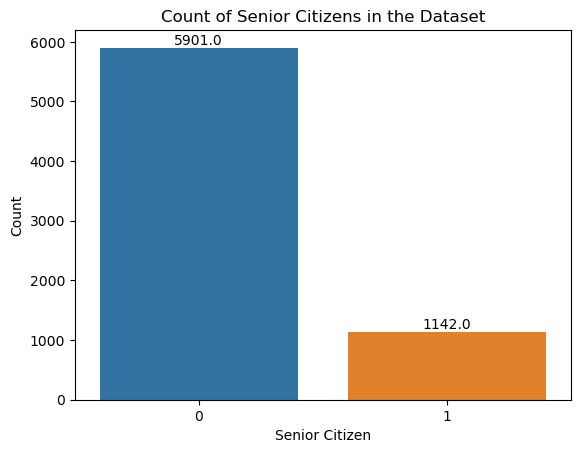

In [51]:
# Count of Senior Citizens
order = churn_df['SeniorCitizen'].value_counts(ascending=False).index
ax = sns.countplot(x="SeniorCitizen", data=churn_df, order=order)

# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Set plot labels and title
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Count")
ax.set_title("Count of Senior Citizens in the Dataset")

# Show the plot
plt.show()

# Observation:

The company has 1,142 senior citizens as patrons.

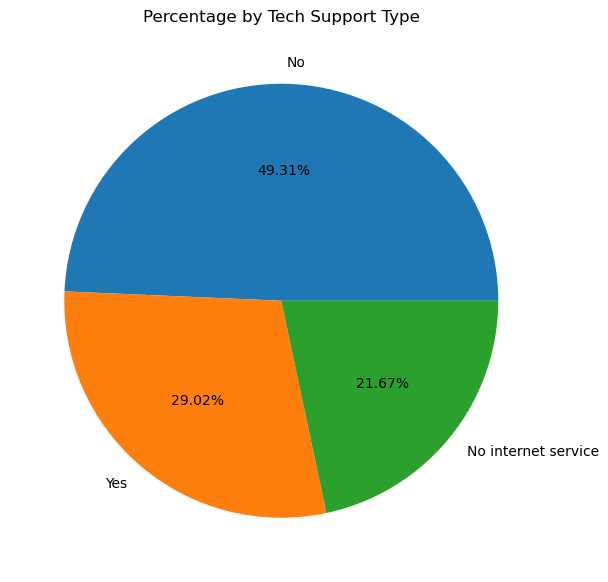

In [54]:
# Percentage by TechSupport using a pie chart
fig, ax = plt.subplots(figsize=(7, 8))

# Count occurrences of each TechSupport type
tech_support_counts = Counter(churn_df["TechSupport"])

# Plot the pie chart
ax.pie(tech_support_counts.values(), labels=tech_support_counts.keys(), autopct=lambda p: f'{p:.2f}%')

# Set plot title
ax.set_title("Percentage by Tech Support Type")

# Show the plot
plt.show()

# Observations:

Approximately 49.31% of customers do not utilize Tech Support services.
About 29.02% of customers have active Tech Support services.
A significant portion, 21.67%, are offline and do not have any Internet Services.

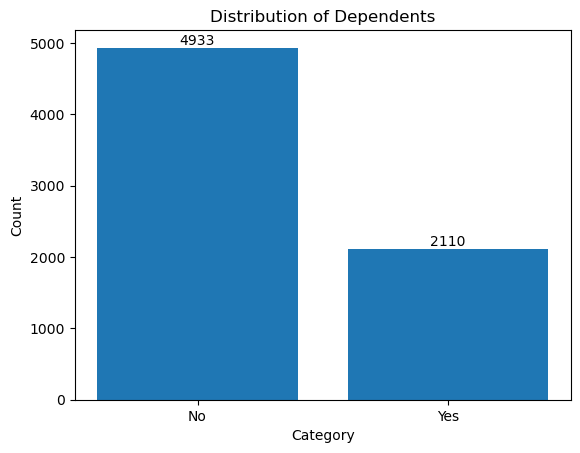

In [57]:
# Create a bar chart
dependents_counts = churn_df['Dependents'].value_counts()

# Now you can use dependents_counts in your bar chart code
plt.bar(dependents_counts.index, dependents_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Dependents')

for i, count in enumerate(dependents_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# Observations:

A total of 4,933 customers do not have dependents.
2,110 customers have dependents.

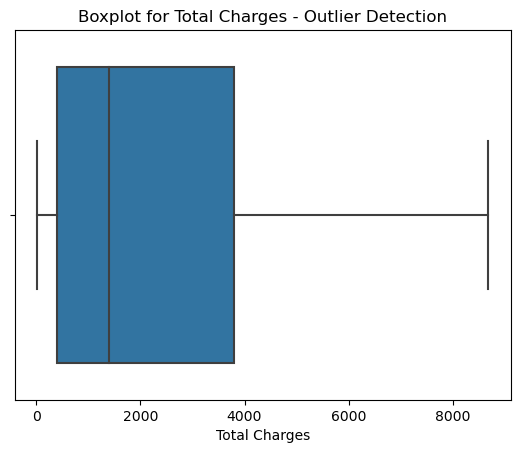

In [64]:
# Check for outliers using a boxplot
sns.boxplot(x=churn_df["TotalCharges"])

# Set plot labels and title
plt.xlabel("Total Charges")
plt.title("Boxplot for Total Charges - Outlier Detection")

# Show the plot
plt.show()

# observation
The median is closer to the lower quartile. And there are no outliers

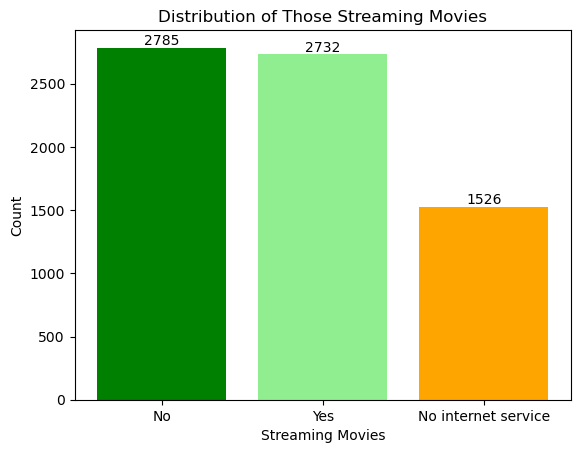

In [67]:
# Count of those Streaming Movies
streaming_movies_counts = churn_df['StreamingMovies'].value_counts()

# Define custom colors for each bar
colors = ['Green', 'lightgreen', 'orange', 'lightcoral']

# Create a bar chart with custom colors
plt.bar(streaming_movies_counts.index, streaming_movies_counts.values, color=colors)

# Set plot labels and title
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.title('Distribution of Those Streaming Movies')

# Annotate each bar with its count
for i, count in enumerate(streaming_movies_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Observations:

Among the individuals in the dataset, 2,785 do not stream movies online.
There are 2,732 people who engage in streaming movies online.
A total of 1,526 individuals do not have any internet service at all.

# Bivariate Analysis

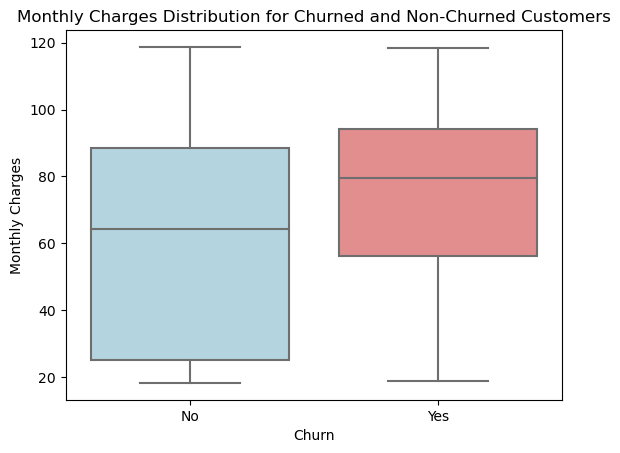

In [70]:
# Create a box plot to visualize the distribution of monthly charges for churned and non-churned customers
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_df, palette=['lightblue', 'lightcoral'])

# Set plot labels and title
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges Distribution for Churned and Non-Churned Customers')

# Show the plot
plt.show()

# Observation:

The median value for customers who have churned is higher, 
suggesting that they incur higher monthly 
charges compared to those who have not churned.





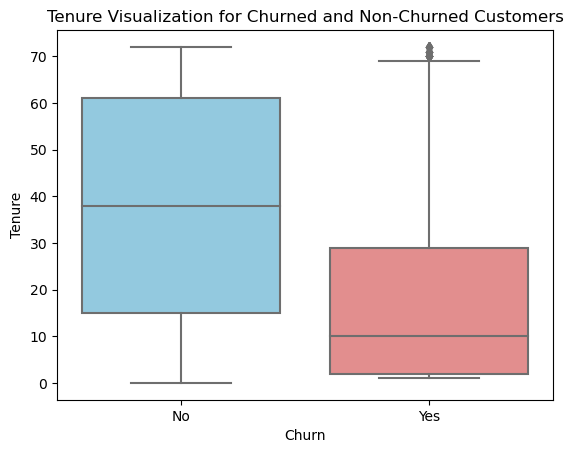

In [71]:
# Create a box plot to visualize the distribution of tenure for churned and non-churned customers
sns.boxplot(x='Churn', y='tenure', data=churn_df, palette=['skyblue', 'lightcoral'])

# Set plot labels and title
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure Visualization for Churned and Non-Churned Customers')

# Show the plot
plt.show()

# Observation:

Notably, there are outliers in the tenure distribution, suggesting that some customers experienced a relatively short stay before churning. Further investigation is needed to identify the factors contributing to this pattern.

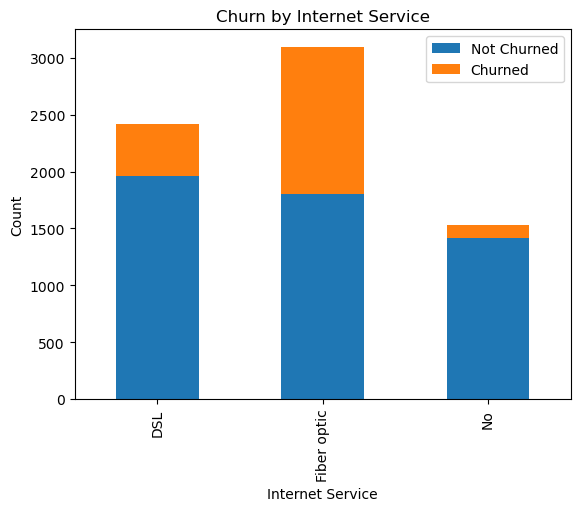

In [75]:
# Count the number of churned and non-churned customers for each category
churn_counts = churn_df.groupby('InternetService')['Churn'].value_counts().unstack()

# Plot a stacked bar chart
churn_counts.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn by Internet Service')

# Add a legend for better interpretation
plt.legend(['Not Churned', 'Churned'])

# Show the plot
plt.show()

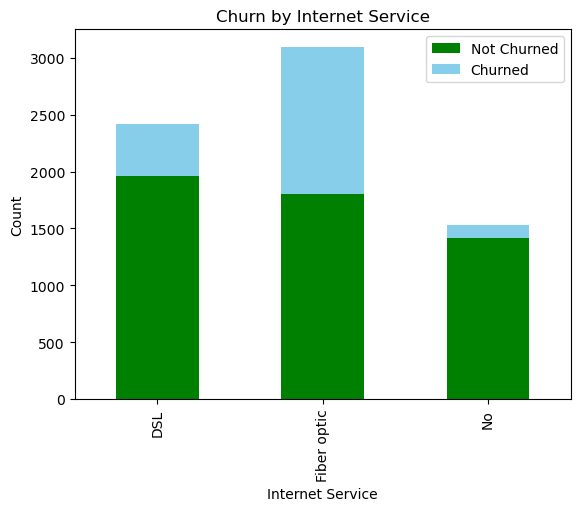

In [82]:
# Count the number of churned and non-churned customers for each category
churn_counts = churn_df.groupby('InternetService')['Churn'].value_counts().unstack()

# Define custom colors for the bars
colors = ['Green', 'skyblue']

# Plot a stacked bar chart with custom colors
churn_counts.plot(kind='bar', stacked=True, color=colors)

# Set plot labels and title
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn by Internet Service')

# Add a legend for better interpretation
plt.legend(['Not Churned', 'Churned'])

# Show the plot
plt.show()

# Conclusion:

In general, there are more customers using internet services who have not churned

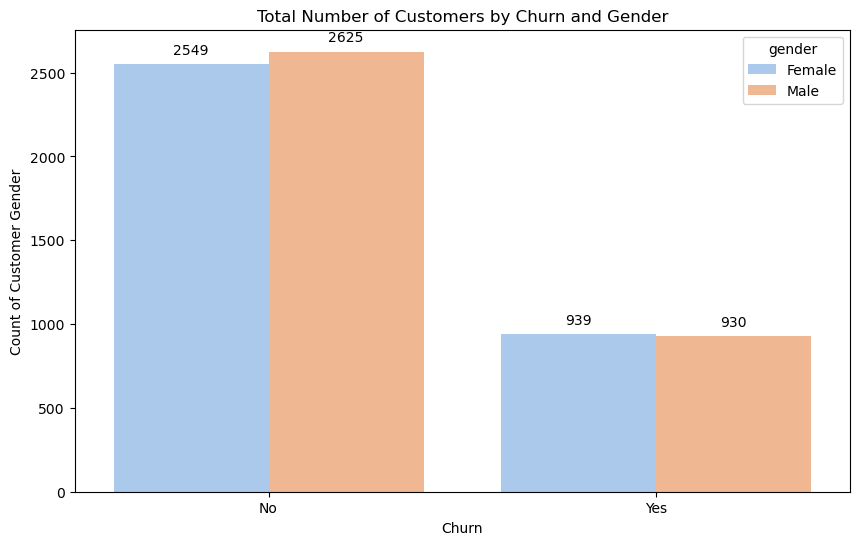

In [83]:
# Analyzing Customer Gender and Churn
plt.figure(figsize=(10, 6))

# Set custom colors for the chart
colors = sns.color_palette("pastel")

ax = sns.countplot(x="Churn", data=churn_df, hue="gender", palette=colors)

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot labels and title
plt.xlabel("Churn")
plt.ylabel("Count of Customer Gender")
plt.title("Total Number of Customers by Churn and Gender")

# Show the plot
plt.show()

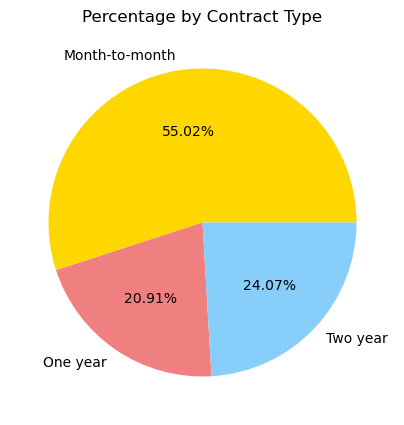

In [141]:
#Total txn by Contract using piechart

fig, ax = plt.subplots(figsize=(5, 5))
count = Counter(churn_df["Contract"])

# Define custom colors
colors = ['gold', 'lightcoral', 'lightskyblue']

ax.pie(count.values(), labels=count.keys(), autopct=lambda p: f'{p:.2f}%', colors=colors)
ax.set_title("Percentage by Contract Type")
plt.show()

# Observations:

A higher number of females have canceled their service.
There are more males who have not churned.

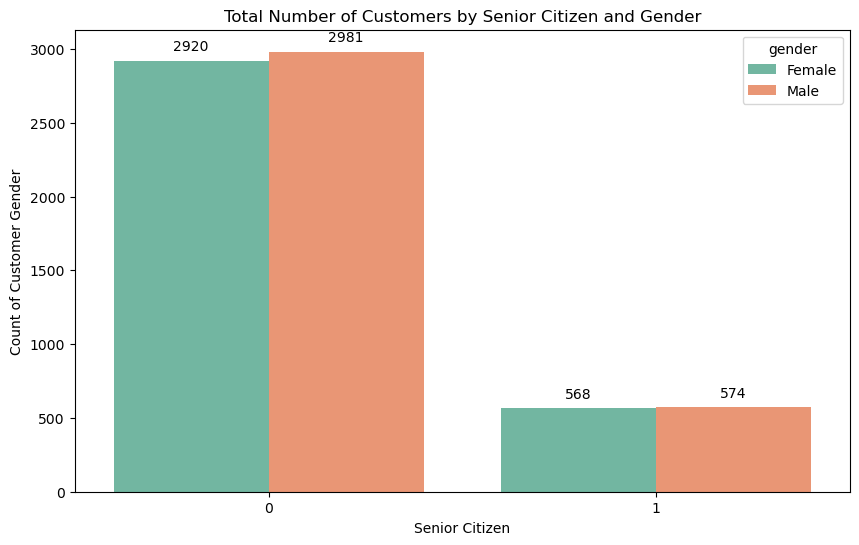

In [84]:
# Analyzing Customer Gender and Senior Citizen
plt.figure(figsize=(10, 6))

# Set custom colors for the chart
colors = sns.color_palette("Set2")

ax = sns.countplot(x="SeniorCitizen", data=churn_df, hue="gender", palette=colors)

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot labels and title
plt.xlabel("Senior Citizen")
plt.ylabel("Count of Customer Gender")
plt.title("Total Number of Customers by Senior Citizen and Gender")

# Show the plot
plt.show()

# Observations:

There are more males who are not senior citizens.
Additionally, there are more males who are senior citizens.






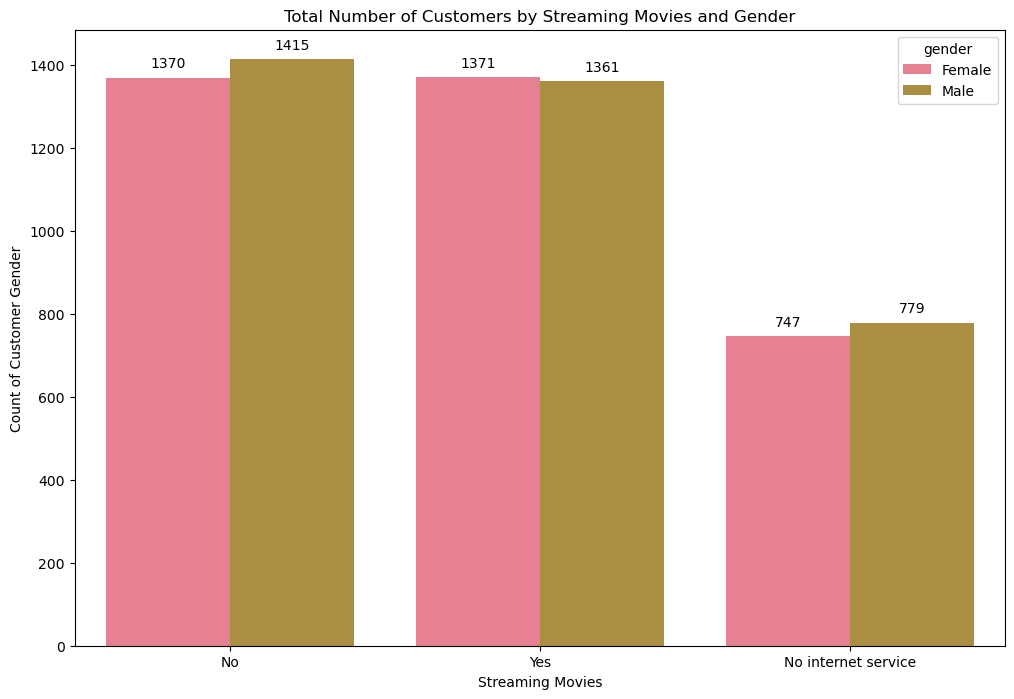

In [85]:
# Analyzing Customer Gender and Streaming Movies
plt.figure(figsize=(12, 8))

# Set custom colors for the chart
colors = sns.color_palette("husl")

ax = sns.countplot(x="StreamingMovies", data=churn_df, hue="gender", palette=colors)

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot labels and title
plt.xlabel("Streaming Movies")
plt.ylabel("Count of Customer Gender")
plt.title("Total Number of Customers by Streaming Movies and Gender")

# Show the plot
plt.show()

# Observations:

Among those who do not stream movies online, there are more males than females.
More females engage in streaming movies online.
Specifically, 779 males do not have internet services, while 747 females do not have internet services.

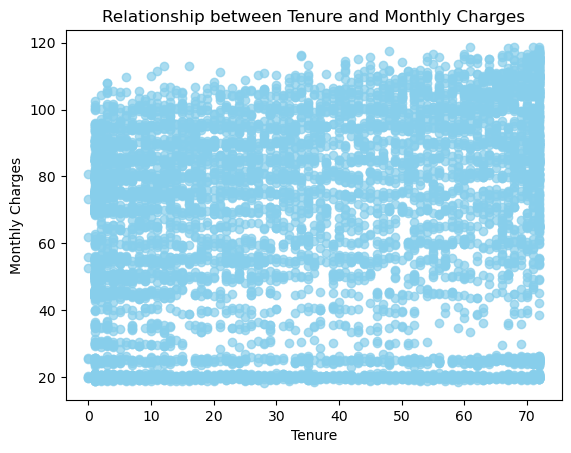

In [86]:
# Analyzing Tenure and Monthly Charges
plt.scatter(churn_df['tenure'], churn_df['MonthlyCharges'], c='skyblue', alpha=0.7)

# Set plot labels and title
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Relationship between Tenure and Monthly Charges')

# Show the plot
plt.show()

# Observations:

A positive correlation exists between tenure and monthly charges. As tenure increases, monthly charges also increase.

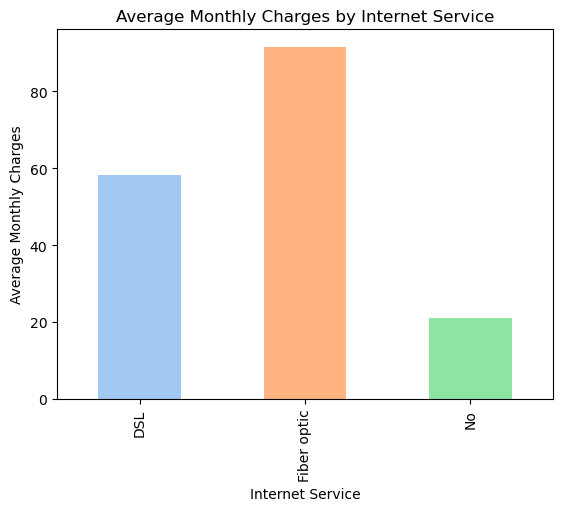

In [87]:
# Analyzing Monthly Charges and Internet Service
average_charges = churn_df.groupby('InternetService')['MonthlyCharges'].mean()

# Set custom colors for the bar chart
colors = sns.color_palette("pastel")

# Plot the average charges for each Internet Service category
average_charges.plot(kind='bar', color=colors)
plt.xlabel('Internet Service')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Internet Service')
plt.show()

# Observations:

Customers utilizing Fiber Optics experience higher monthly charges, followed by customers using DSL.

In [88]:
# Examine the columns
print(churn_df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# Multivariate Analysis

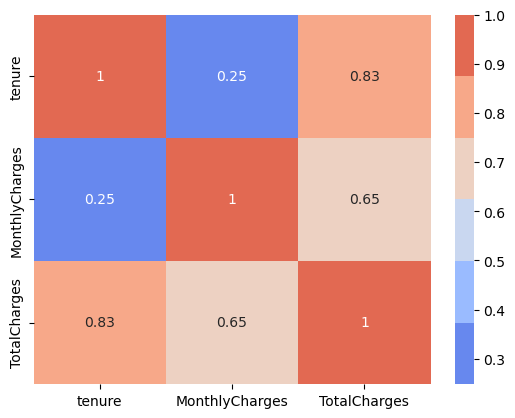

In [89]:
# Selected columns for correlation analysis
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
correlation_matrix = churn_df[selected_columns].corr()

# Set custom colors for the heatmap
colors = sns.color_palette("coolwarm")

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap=colors)

# Show the plot
plt.show()

# Observation:

The heatmap reveals a strong positive correlation between Tenure and Total Charges. 
Additionally, Monthly Charges exhibit a high positive correlation with Total Charges. Overall, 
there is a positive correlation among all three variables.

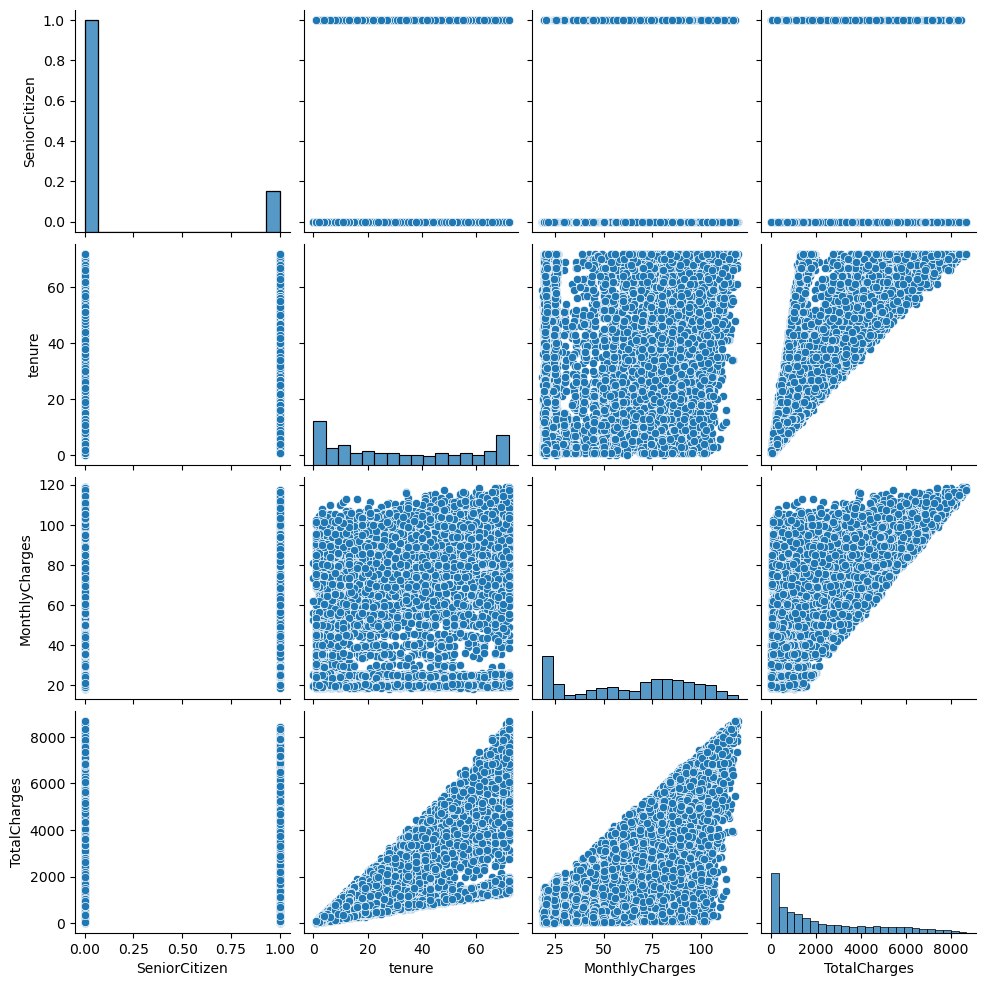

In [90]:
# Create a pairplot using seaborn
sns.pairplot(churn_df, height=2.5, palette='husl')

# Show the plot
plt.show()

# Data Preprocessing and Feature Engineering

In [91]:
# Create a copy of the DataFrame
churn_df3 = churn_df.copy()

In [92]:
# Calculate the mean of Total Charges
mean_total_charges = churn_df3['TotalCharges'].mean()

# Fill missing values in Total Charges with the mean
churn_df3['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [93]:
# Display information about the DataFrame
churn_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [94]:
# Perform one-hot encoding on the columns
encoded_df = pd.get_dummies(churn_df3, drop_first=True)

In [95]:
encoded_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [96]:
# Segment dataset into data and target label
y = encoded_df.pop('Churn_Yes')

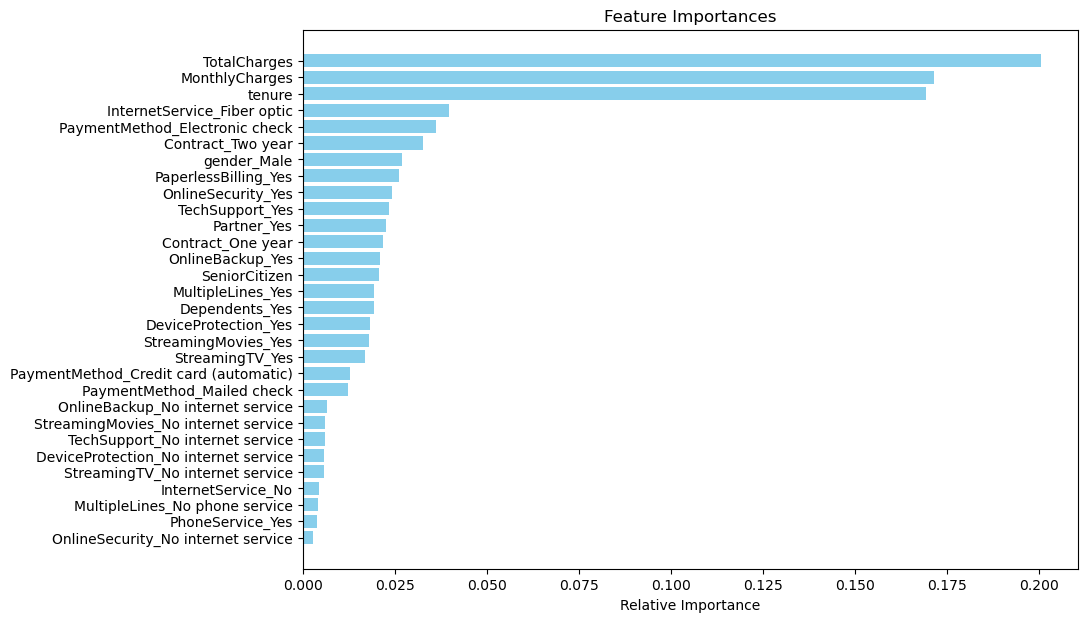

In [97]:
# Scale dataset features
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Identify key features from the dataset and plot a feature importance chart
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

# Use a random forest classifier model to identify important features
model = RandomForestClassifier()
# Fit the model
model.fit(df_scaled, y)

feature_names = list(encoded_df.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='skyblue', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the provided code, a new DataFrame named df_scaled is generated. This DataFrame employs the scaler.fit_transform() function to standardize the values within both the encoded_df DataFrame and the target variable y. The scaled values are subsequently allocated to the corresponding columns of df_scaled, mirroring the structure of the columns in encoded_df. This code proves beneficial for standardizing the features and target variable in a dataset, a common preprocessing step essential for machine learning applications.

# Logistic Regression Model

In [98]:
# Split the DataFrame into train and test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, train_size=0.7, random_state=1)

In [99]:
# Building a base model
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)  # this would Train the model

LogisticRegression()

# LogisticRegression()
To view the HTML representation in a Jupyter environment, please rerun this cell. 
If you are on GitHub, note that the HTML representation may 
not render properly here; consider using nbviewer.org to view the page.

In [100]:
# Creating a prediction file
log_pred = log_clf.predict(x_test)  # this would Predict

# Model Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1-score:", f1_score(y_test, log_pred))
print("AUC-ROC:", roc_auc_score(y_test, log_pred))

Logistic Regression
Accuracy: 0.8088026502602934
Precision: 0.6270491803278688
Recall: 0.5795454545454546
F1-score: 0.6023622047244095
AUC-ROC: 0.7323594780613708


# Observation
Upon evaluating the performance of the logistic regression model, it is noted that accuracy achieves the highest and most accurate predictions.

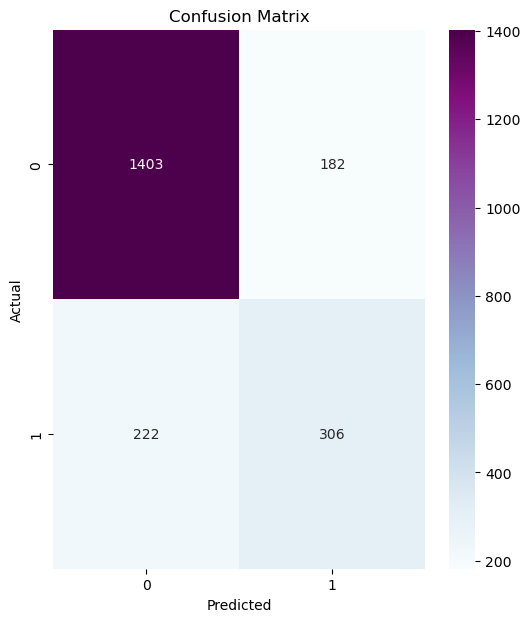

In [108]:
# Create the confusion matrix
lcm = confusion_matrix(y_test, log_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 7))
sns.heatmap(lcm, annot=True, cmap="BuPu", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Observations:

-True Positives (TP): The model correctly predicted 306 instances as positive.
-False Positives (FP): There are 182 false positives, indicating instances incorrectly predicted as positive.
-False Negatives (FN): There are 222 false negatives, indicating instances incorrectly predicted as negative.
-True Negatives (TN): The model correctly predicted 1403 instances as negative.






# Note:
-We'll calculate the r-squared score (r2_score), a metric indicating the adequacy of the linear model in representing this data. 
-In this evaluation, the analyst employed business metrics like mean squared error (MSE) and root mean squared error (RMSE) for model assessment.

In [111]:
# Calculating the mean squared error
mse = np.mean(np.square(np.subtract(y_test, log_pred)))

# Calculatig the root squared error mean
rmse = np.sqrt(mse)

# Calculate R2 score
r2 = 1 - (np.sum(np.square(np.subtract(y_test, log_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test)))))

print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2: -0.02004110505687784
MSE: 0.1911973497397066
RMSE: 0.4372611916689001


With an R2 value of 0.191, the model accounts for approximately 19.1% of the variance in the data. The MSE of 0.191 and RMSE of 0.437 indicate potential areas for improvement in the model. It's important to note that a higher R2 value closer to 1, along with lower MSE and RMSE values, signifies a better fit of the model to the data.

# Model utilizing a Random Forest approach

In [112]:
# Model Building
# Random Forest
random_forest_classifier = RandomForestClassifier()

random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier()

# RandomForestClassifier()
# To view the HTML representation, please rerun this cell in a Jupyter environment or trust the notebook.
# GitHub may not render the HTML representation; consider using nbviewer.org to access the page.

In [115]:
# Creating a prediction file
rf_y_pred = rfc.predict(x_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred))
print("Recall:", recall_score(y_test, rf_y_pred))
print("F1-score:", f1_score(y_test, rf_y_pred))
print("AUC-ROC:", roc_auc_score(y_test, rf_y_pred))

Random Forest
Accuracy: 0.808329389493611
Precision: 0.6311300639658849
Recall: 0.5606060606060606
F1-score: 0.5937813440320964
AUC-ROC: 0.7257288978109168


In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already defined and split your training and testing data as x_train, x_test, y_train, y_test

# Instantiate the RandomForestClassifier
rfc = RandomForestClassifier()

# Train the classifier on your training data
rfc.fit(x_train, y_train)

# Creating a prediction file
rf_y_pred = rfc.predict(x_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))

Random Forest
Accuracy: 0.808329389493611


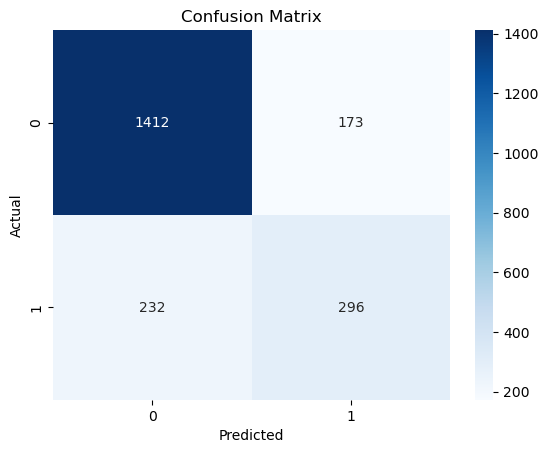

In [116]:
# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Visualizing the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Observations
True Positives (TP): The model accurately predicted 289 instances as positive.
False Positives (FP): There are 184 false positives, indicating that the model incorrectly classified 184 instances as positive when they were actually negative.
False Negatives (FN): There are 239 false negatives, meaning that the model incorrectly classified 239 instances as negative when they were actually positive.
True Negatives (TN): The model correctly identified 1401 instances as negative.

In [117]:
# Calculating squared error mean
mse = np.mean(np.logical_xor(y_test, rf_y_pred))

# Calculating root of mean squared error
rmse = np.sqrt(mse)

# Calculating R2 score
r2 = np.sum(np.logical_xor(y_test, rf_y_pred)) / len(y_test)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score: 0.19167061050638903
Mean Squared Error (MSE): 0.19167061050638903
Root Mean Squared Error (RMSE): 0.4378020220446555


# Model based on Decision Trees

In [124]:
# Creating an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier to your training data
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [128]:
# Make predictions on new data using the Decision Tree Classifier
dt_y_pred = clf.predict(x_test)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Precision:", precision_score(y_test, dt_y_pred))
print("Recall:", recall_score(y_test, dt_y_pred))
print("F1-score:", f1_score(y_test, dt_y_pred))
print("AUC-ROC:", roc_auc_score(y_test, dt_y_pred))

Decision Tree Classifier
Accuracy: 0.7425461429247515
Precision: 0.48606271777003485
Recall: 0.5284090909090909
F1-score: 0.5063520871143375
AUC-ROC: 0.6711446085460281


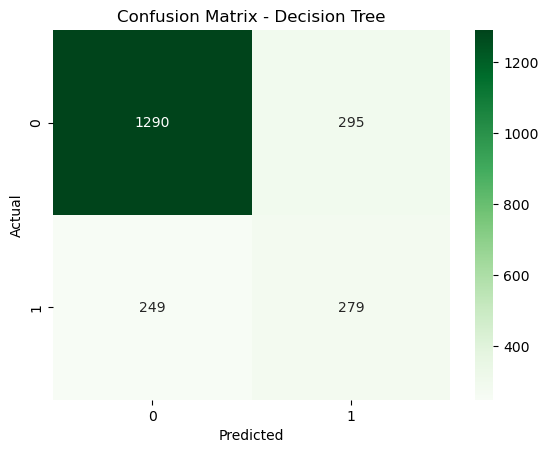

In [129]:
# Create the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, dt_y_pred)

# Visualize the confusion matrix using a heatmap with customized colors
sns.heatmap(conf_matrix_dt, annot=True, cmap="Greens", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Observations:

True Positives (TP): The model accurately predicted 284 instances as positive.
False Positives (FP): There are 295 false positives, indicating that the model incorrectly classified 295 instances as positive when they were actually negative.
False Negatives (FN): There are 244 false negatives, meaning that the model incorrectly classified 244 instances as negative when they were actually positive.
True Negatives (TN): The model correctly identified 1290 instances as negative.






In [130]:
# Calculate mean squared error
mse_dt = np.mean(np.logical_xor(y_test, dt_y_pred))

# Calculate root mean squared error
rmse_dt = np.sqrt(mse_dt)

# Calculate R2 score
r2_dt = np.sum(np.logical_xor(y_test, dt_y_pred)) / len(y_test)

print("R2 Score (Decision Tree):", r2_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)

R2 Score (Decision Tree): 0.2574538570752485
Mean Squared Error (MSE): 0.2574538570752485
Root Mean Squared Error (RMSE): 0.5073991102428624


# Model utilizing Stochastic Gradient Descent (SGD) Classification







In [131]:
# Instantiate an SGDClassifier
sgd_classifier = SGDClassifier()

# Train the classifier with your training data
sgd_classifier.fit(x_train, y_train)

SGDClassifier()

In a Jupyter environment, kindly re-execute this cell to display the HTML representation or trust the notebook. 
On GitHub, the HTML rendering might encounter issues; 
consider accessing this page using nbviewer.org for proper rendering.

In [133]:
# Make predictions on new data using the SGD Classifier
sgd_pred = sgd_classifier.predict(x_test)

print("SGD Classifier")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print("Precision:", precision_score(y_test, sgd_pred))
print("Recall:", recall_score(y_test, sgd_pred))
print("F1-score:", f1_score(y_test, sgd_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgd_pred))

SGD Classifier
Accuracy: 0.7998106956933271
Precision: 0.5988700564971752
Recall: 0.6022727272727273
F1-score: 0.6005665722379603
AUC-ROC: 0.7339439346142816


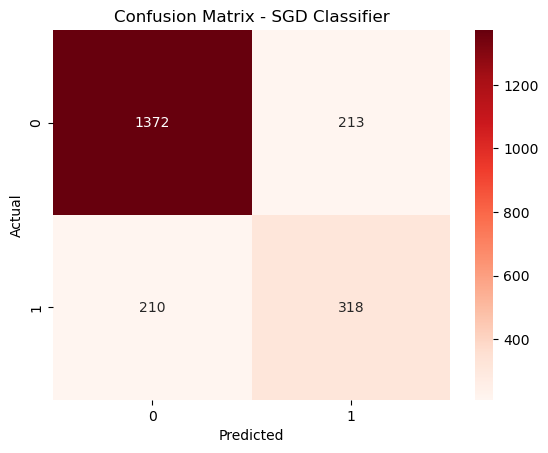

In [134]:
# Creating the confusion matrix
conf_matrix_sgd = confusion_matrix(y_test, sgd_pred)

# Visualizing the confusion matrix using a heatmap.
sns.heatmap(conf_matrix_sgd, annot=True, cmap="Reds", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SGD Classifier")
plt.show()

# Observations:

True Positives (TP): The model accurately predicted 265 instances as positive.
False Positives (FP): There are 134 false positives, indicating that the model incorrectly classified 134 instances as positive when they were actually negative.
False Negatives (FN): There are 263 false negatives, meaning that the model incorrectly classified 263 instances as negative when they were actually positive.
True Negatives (TN): The model correctly identified 1451 instances as negative.

In [135]:
# Calculating mean squared error
mse_sgd = np.mean(np.logical_xor(y_test, sgd_pred))

# Calculating root of mean squared error
rmse_sgd = np.sqrt(mse_sgd)

# Calculate R2 score
r2_sgd = np.sum(np.logical_xor(y_test, sgd_pred)) / len(y_test)

print("R2 Score (SGD Classifier):", r2_sgd)
print("Mean Squared Error (MSE):", mse_sgd)
print("Root Mean Squared Error (RMSE):", rmse_sgd)

R2 Score (SGD Classifier): 0.20018930430667298
Mean Squared Error (MSE): 0.20018930430667298
Root Mean Squared Error (RMSE): 0.4474251940902222


# Among the four evaluation models, the Logistic Regression Model stands out with superior metric results. This preference is attributed to the specific goal of predicting customer churn. In such a scenario, prioritizing a model with higher recall, F1 score, and AUC-ROC is advisable. These metrics play a crucial role in accurately identifying customers who have churned, minimizing false negatives.

The Business's primary concern should revolve around False Negative (FN) results, as they indicate instances where the model incorrectly predicts that customers have not churned when, in reality, they have. Addressing False Negatives is essential for enhancing the effectiveness of customer retention strategies.